In [31]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Загрузим обучающую и тестовую выборки.

In [32]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [33]:
x_train.shape

(60000, 28, 28)

In [34]:
x_train[333]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 138,
        170, 253, 201, 244, 212, 222, 138,  86,  22,   0,   0,   0,   0,
          0,   0],
       [  

In [35]:
y_train[333]

8

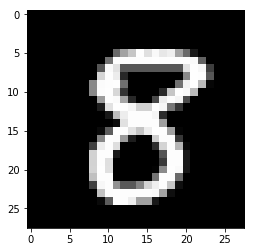

In [36]:
plt.imshow(x_train[333], cmap='Greys_r')

In [37]:
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


Для распознавания рукописных цифр будем использовать полносвязную нейронную сеть, где каждый нейрон входного слоя характеризует один пиксель исходного изображения. При этом сами изображения представляют собой матрицу чисел, поэтому для дальнейшей работы необходимо выполнить преобразования над данными.

С помощью функции `reshape` преобразуйте каждую матрицу в вектор длины 28*28 (размер исходных изображений).

Поскольку мы будем использовать градиентные методы обучения, необходимо также нормализовать данные.

In [38]:
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

В данный момент значение целевой переменной каждого изображения представляет собой цифру от 0 до 9. Для решения задачи многоклассовой классификации можно использовать функцию softmax. Её выход при этом - вектор вероятностей принадлежности к каждому из классов. Таким образом, возникает необходимость преобразовать `y_train` и `y_test`.

Для этих целей в `keras` доступна функция `keras.utils.to_categorical`, принимающая на вход исходный вектор значений и количество классов. Примените данную функцию к  `y_train` и  `y_test`.

In [39]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

Теперь можно приступать к обучению сети. Будем использовать следующую архитектуру:
- на вход подается 784 значения;
- далее идет полносвязный слой с 256 нейронами и функцией активации `relu`;
- для повышения обобщающей способности модели добавим `Dropout(0.2)`, где `0.2` - вероятность отключения каждого из нейронов слоя;
- далее еще один полносвязный слой с 256 нейронами и функцией активации `relu`;
- последний слой - выход сети - полносвязный слой с числом нейронов, равным числу классов и функцией активации `softmax`.

In [40]:
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

In [41]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


Обучите полученную модель на обучающей выборке. Для обучения:
- выберите нужную функцию потерь: https://keras.io/losses/; 
- optimizer - RMSProp: https://keras.io/optimizers/; 
- размер мини-батча - 128;
- число эпох - 10;
- на каждом шаге выводите значение `accuracy` как на обучающей, так и на тестовой выборках.

In [42]:
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])

In [43]:
batch_size = 128
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

W0706 01:34:32.467166  4796 deprecation.py:323] From c:\users\shiro\appdata\local\programs\python\python37\lib\site-packages\keras\optimizers.py:279: BaseResourceVariable.constraint (from tensorflow.python.ops.resource_variable_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Apply a constraint manually following the optimizer update step.
W0706 01:34:34.092665  4796 deprecation_wrapper.py:118] From c:\users\shiro\appdata\local\programs\python\python37\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 58us/step - loss: 0.5131 - accuracy: 0.8462 - val_loss: 0.2046 - val_accuracy: 0.9372
Epoch 2/30
60000/60000 [==============================] - 2s 34us/step - loss: 0.2524 - accuracy: 0.9255 - val_loss: 0.1616 - val_accuracy: 0.9531
Epoch 3/30
60000/60000 [==============================] - 2s 35us/step - loss: 0.1998 - accuracy: 0.9413 - val_loss: 0.1379 - val_accuracy: 0.9594
Epoch 4/30
60000/60000 [==============================] - 3s 44us/step - loss: 0.1752 - accuracy: 0.9476 - val_loss: 0.1244 - val_accuracy: 0.9650
Epoch 5/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.1555 - accuracy: 0.9542 - val_loss: 0.1160 - val_accuracy: 0.9662
Epoch 6/30
60000/60000 [==============================] - 2s 37us/step - loss: 0.1456 - accuracy: 0.9575 - val_loss: 0.1078 - val_accuracy: 0.9697
Epoch 7/30
60000/60000 [==============================] - 2s 36us/st

In [44]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11518295423117525
Test accuracy: 0.9763000011444092


In [46]:
model_2 = Sequential()

model_2.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (5, 5), strides = (2,2)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))
model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))